## Homework Assignment 4 -- Due April 1st at 10am -- Still a draft, incomplete.

This assignment primarily concerns the material in notebooks **8, 12, 13** and the associated labs.

Save your completed homework file in your repository, as **mp248/Assignment.4/Assignment.4.ipynb**.

Ensure you do **not** copy any of the weather data or crime data into your personal repo.  If such files are discovered in your repo you will lose one point, i.e. you will have a **maximum grade** of **9/10** on the assignment.

The pre-grading script will start grading by Saturday, uploading feedback to **Task 8**.

* * *

## P1: Weather data

Load the common weather data for the four cities as we did in **Lecture Notebook 12**.  

a) For each city, and each month, compute the average of: daily max, min and mean temperatures for that month.  In more concrete detail: for Edmonton January max temperatures, you would take the average of all the maximum temperatures for every day in January, for all years in which we have data, for the city of Edmonton.  You would do the same for every month, and all three temperature readings (daily max, min, mean).  Output your answer as four $12 \times 3$ numpy matrices. 

<span style="color:red">When grading look for a 12x3 numpy array. The rows correspond to the months, and the columns should correspond to temperature readings: daily max, min, mean. </span>

b) For every city, and every weather reading (daily max, min, mean), find the weather record where that daily temperature recording differs from the monthly average by the largest amount. i.e. your answer to part (b) will consist of **12** weather records. Please format your answer so that you have your **12=4*3** answers on one line each. For example, one line would be:

    Edmonton, Mean Temp (°C), avg: AVG, Temp: TMP, Dev: DEV, Date: YYYY-MM-DD
    
This would be the answer for Edmonton's Mean temperature readings.  YYYY-MM-DD would be the date of the maximum deviation from the average of all temperatures in the month MM.  TMP is the temperature reading on that day (in this case, the daily mean temp).  AVG is the average of the temperature readings for month MM.  DEV is the difference between TMP and AVG, i.e. DEV = TMP-AVG

<span style="color:red">When grading we are looking for 12 lines, roughly of the form above.  The lines need to contain the city name, the weather reading (max, min, mean), the weather record with the largest deviation and the date it occurs on. Ideally students would format their answers as suggested above.</span>


In [3]:
import os
import datlib
import collections as co
import numpy as np
import pprint as pp
import calendar as cal

## coml common weather dates.
## clean_dat crime stats
## vic_dict Victoria crime stats

## Part (a)

## will be indexed by pairs (city, max/min/mean, month). 
## count of number of days of this type
dayct = co.defaultdict(int)
daysum = co.defaultdict(float)

for i in range(len(datlib.dictL)):
    city = datlib.dictN[i]
    D = datlib.dictL[i]
    for j in range(3):
        wr = datlib.ncl[j]
        for mo in range(1,13):
            tup = (city, wr, mo)
            for k in datlib.coml:
                ## k is the date
                ## v[wr] is the weather data.
                if k.month==mo:
                    dayct[tup] += 1
                    daysum[tup] += D[k][wr]
                    

datlib cwd /home/rybu/teaching/math248/mp248-planning/Quizzes_Assignments_Exams


In [4]:
print(len(datlib.coml))

1481


In [21]:
avgdat = {k:daysum[k]/dayct[k] for k in dayct.keys()}
citmat = {k:np.zeros(shape=(12,3)) for k in datlib.dictN}
for k,v in avgdat.items():
    citmat[k[0]][k[2]-1][datlib.ncl.index(k[1])] = v
for k in datlib.dictN:
    print(k)
    print(citmat[k])
## avgdat[(city, wr, month)]

Edmonton
[[ -4.27786885 -15.48442623  -9.90081967]
 [ -4.68108108 -15.72522523 -10.22342342]
 [  1.77903226  -9.32096774  -3.77822581]
 [ 10.85916667  -2.90833333   3.9925    ]
 [ 17.98205128   1.84700855   9.93589744]
 [ 21.82931034   7.31206897  14.59310345]
 [ 24.02786885   9.77786885  16.92868852]
 [ 23.15619835   7.53471074  15.37024793]
 [ 17.62564103   2.63247863  10.15641026]
 [ 10.8982906   -2.22222222   4.35042735]
 [ -0.03472222 -10.12152778  -5.09236111]
 [ -4.90866667 -15.40466667 -10.178     ]]
Calgary
[[  0.89836066 -10.0852459   -4.60163934]
 [ -0.11261261 -10.72882883  -5.42432432]
 [  5.02822581  -6.46532258  -0.71129032]
 [ 12.555       -0.59916667   5.99916667]
 [ 17.10683761   3.6974359   10.42820513]
 [ 21.4612069    8.97758621  15.24310345]
 [ 25.02540984  11.47868852  18.27459016]
 [ 23.31652893  10.26859504  16.81487603]
 [ 17.85299145   5.23333333  11.56410256]
 [ 12.4965812    0.33162393   6.43504274]
 [  3.98611111  -6.98819444  -1.50555556]
 [ -0.78466667 -

In [6]:
## Part (b)
## let's store a matrix that has the max deviation, and a dictionary that remembers the date of that deviation

maxdev = co.defaultdict(float)
devdat = dict()

for i in range(len(datlib.dictL)): ## iterate through cities / dictionaries
    city = datlib.dictN[i]
    D = datlib.dictL[i]
    for j in range(3): ## weather stat
        wr = datlib.ncl[j]
        for mo in range(1,13): ## months
            tup = (city, wr, mo)
            for k in datlib.coml:  ## all dates.
                if np.abs(D[k][wr] - avgdat[(city, wr, k.month)]) > maxdev[(city, wr)]:
                    maxdev[(city, wr)] = np.abs(D[k][wr] - avgdat[(city, wr, k.month)])
                    devdat[(city, wr)] = k
                    
for i,v in devdat.items():
    print("City: ", i[0], i[1], cal.month_name[v.month], 'avg: ', '{:2.1f}'.format(avgdat[(i[0], i[1], v.month)]),\
          ' Temp: ', datlib.dictL[datlib.dictN.index(i[0])][v][i[1]], ' Dev: ',\
           '{:2.1f}'.format(datlib.dictL[datlib.dictN.index(i[0])][v][i[1]] - avgdat[(i[0], i[1], v.month)]),\
           "Date:",  v.date())
    

City:  Edmonton Max Temp (°C) March avg:  1.8  Temp:  -24.5  Dev:  -26.3 Date: 2014-03-01
City:  Edmonton Min Temp (°C) March avg:  -9.3  Temp:  -39.0  Dev:  -29.7 Date: 2014-03-01
City:  Edmonton Mean Temp (°C) March avg:  -3.8  Temp:  -31.8  Dev:  -28.0 Date: 2014-03-01
City:  Calgary Max Temp (°C) March avg:  5.0  Temp:  -25.4  Dev:  -30.4 Date: 2014-03-01
City:  Calgary Min Temp (°C) March avg:  -6.5  Temp:  -30.4  Dev:  -23.9 Date: 2014-03-01
City:  Calgary Mean Temp (°C) March avg:  -0.7  Temp:  -27.9  Dev:  -27.2 Date: 2014-03-01
City:  Victoria Max Temp (°C) September avg:  19.7  Temp:  31.2  Dev:  11.5 Date: 2017-09-04
City:  Victoria Min Temp (°C) November avg:  3.4  Temp:  -6.5  Dev:  -9.9 Date: 2014-11-30
City:  Victoria Mean Temp (°C) November avg:  6.9  Temp:  -2.7  Dev:  -9.6 Date: 2014-11-30
City:  Saskatoon Max Temp (°C) March avg:  0.3  Temp:  -24.8  Dev:  -25.1 Date: 2014-03-01
City:  Saskatoon Min Temp (°C) March avg:  -9.8  Temp:  -36.2  Dev:  -26.4 Date: 2014-03-0

## P2: Crime data

Which crimes (use **parent_incident_type**) are more common in proximitiy to The Bay Centre, and which are more common far from the Bay Centre?  Start your analysis with a histogram using the distance function as in **Lab 13.b** problem 3. I suggest starting your analysis using bin endpoints that are integer multiples of $500m$.

Please put any further analysis (by crime) in a text field in your plot.  After your histograms, list the **parent_incident_types** by their from *most commonly* to *least commonly* happening in the vicinity of the Bay Centre.

<span style="color:red">This problem is graded somewhat like an essay.  Students need to make an assertion of which crime occur close to the bay centre, and which do not, plus back their assertion up with the suggested histograms + some other element of analysis.  The further analysis (required) needs to be put in a text field in their plots. </span>

In [7]:
## From Lab 13.b

Re = 6378000 ## let's use metres.

def PC(lat, long):
    return np.array([np.cos(long)*np.cos(lat), np.sin(long)*np.cos(lat), np.sin(lat)])

## this will be our distance function
## it takes the two coordinates, finds the corresponding points on the surface of the earth (at ocean level)
## then finds the angle between them, i.e. arccos(v1.v2) and multiplies by the radius Re.
def dA(lat1, long1, lat2, long2):
    lat1 *= np.pi/180
    lat2 *= np.pi/180
    long1 *= np.pi/180
    long2 *= np.pi/180
    
    p1 = PC(lat1, long1)
    p2 = PC(lat2, long2)
    cosang = sum(p1*p2)
    
    return(Re*np.arccos(cosang))

import matplotlib.pyplot as plt
%matplotlib inline

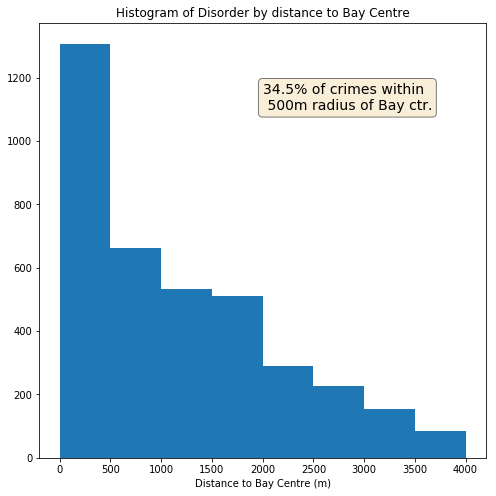

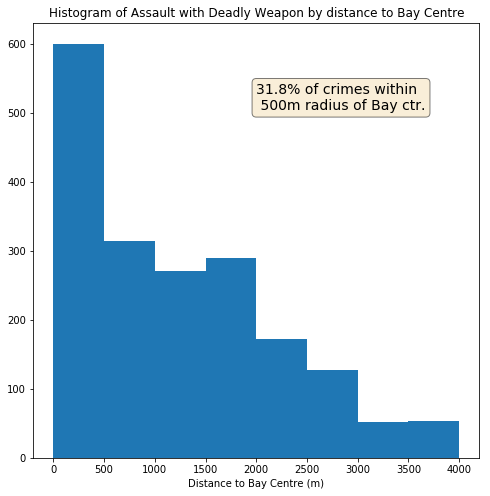

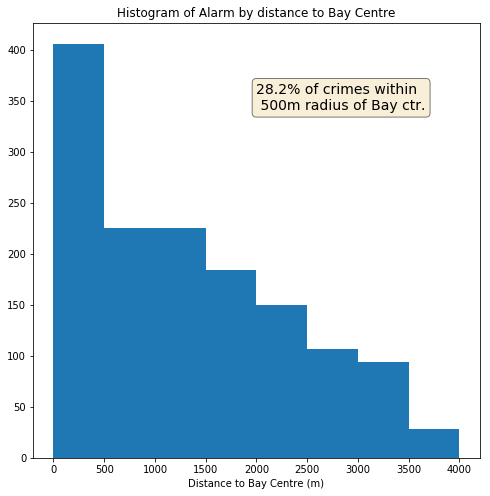

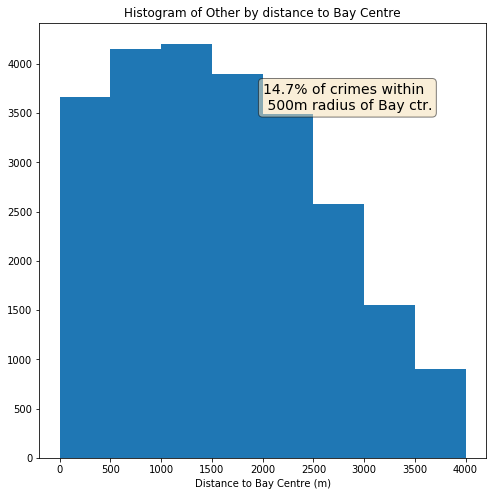

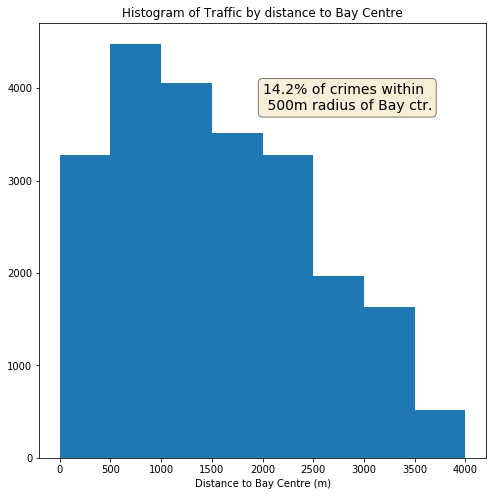

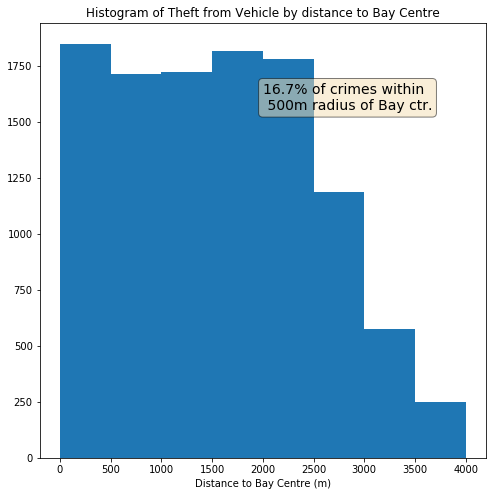

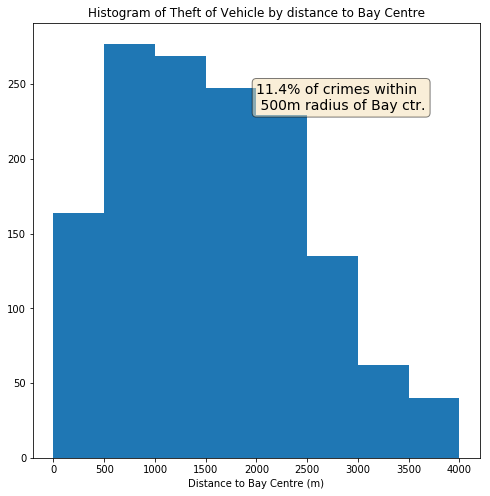

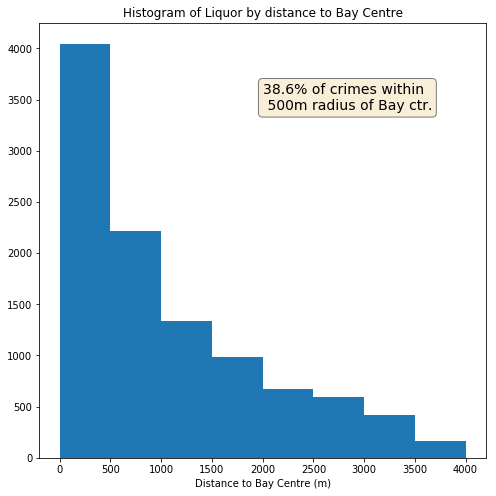

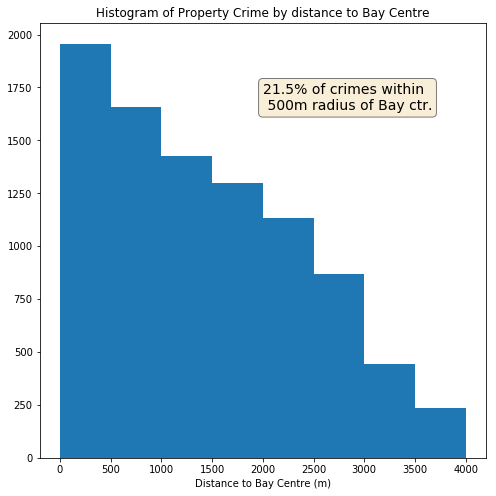

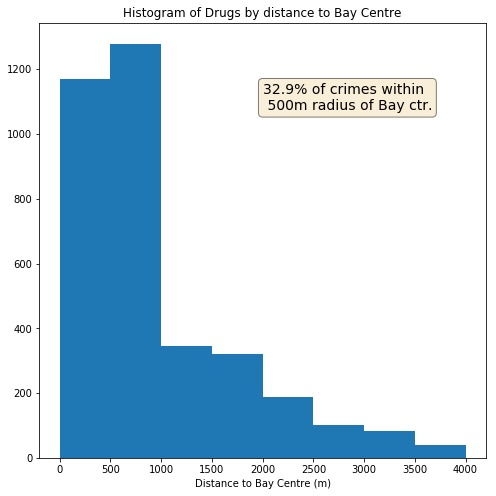

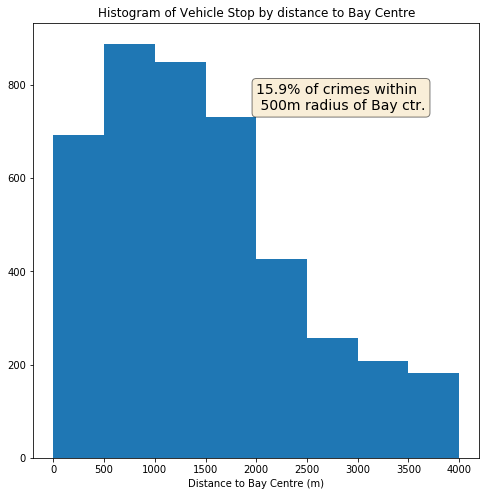

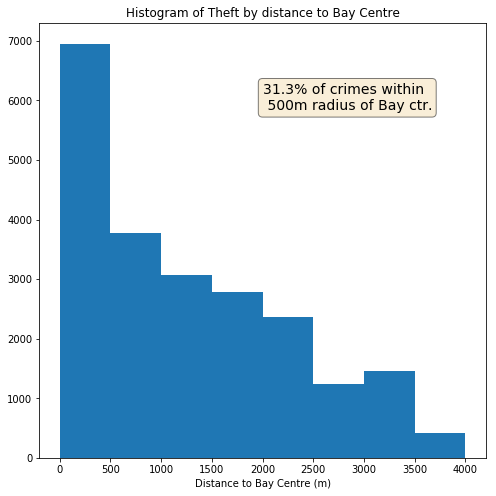

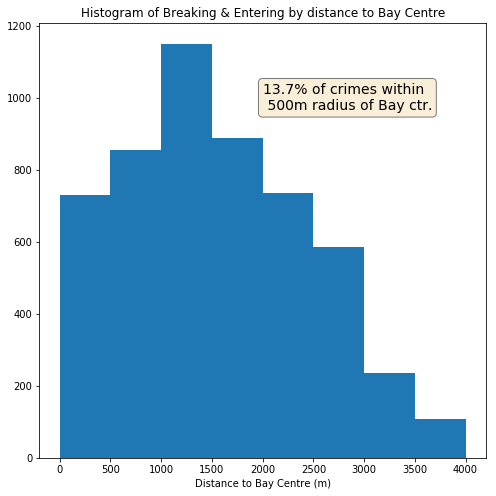

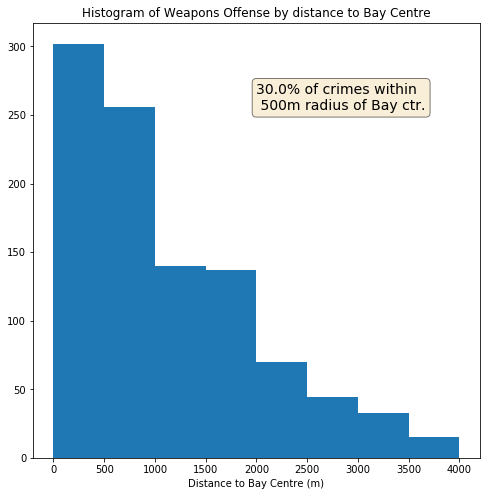

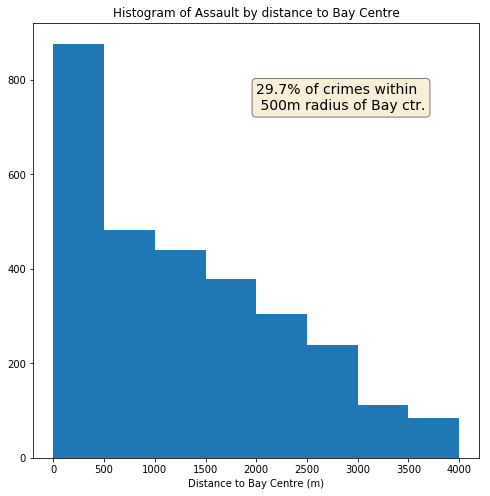

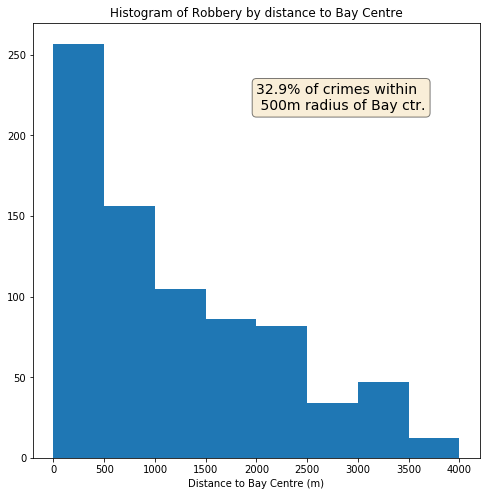

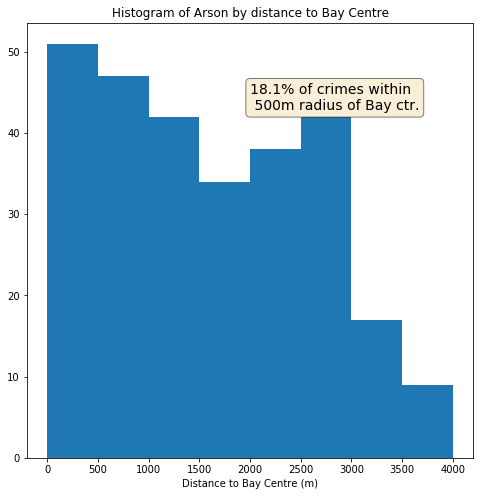

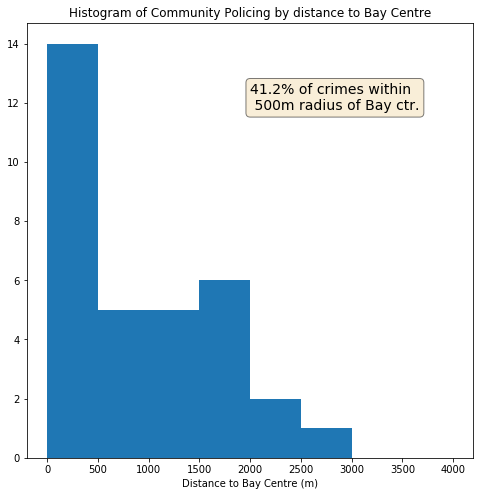

In [8]:
## Let's do a histogram plot, like in Lab 13b, but one for each crime type.
## Appears to be 48.42505, -123.36647
BClat = 48.42505
BClong = -123.36647

for k in datlib.ctree.keys():
    plt.figure(figsize=(8,8))
    plt.title('Histogram of '+k+' by distance to Bay Centre')
    plt.xlabel('Distance to Bay Centre (m)')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    X = [dA(BClat, BClong, x['latitude'], x['longitude']) for x in datlib.clean_dat if x['parent_incident_type']==k]
    A = plt.hist(X, [500*k for k in range(9)] ) # bins=[500*np.sqrt(j) for j in range(10)])
    
    cnear = len([x for x in datlib.clean_dat if dA(BClat, BClong, x['latitude'], x['longitude'])<500.0 and x['parent_incident_type']==k])
    ctot = len([x for x in datlib.clean_dat if x['parent_incident_type']==k])
    
    plt.annotate("%1.1f%% of crimes within\n 500m radius of Bay ctr." % (100.0*cnear/ctot), xy=(0.5, 0.8), xycoords='axes fraction', fontsize=14, bbox=props)

    plt.show()
    

In [9]:
tv = []
for k in datlib.ctree.keys():
    cnear = len([x for x in datlib.clean_dat if dA(BClat, BClong,\
                 x['latitude'], x['longitude'])<500.0 and x['parent_incident_type']==k])
    ctot = len([x for x in datlib.clean_dat if x['parent_incident_type']==k])
    tv.append( (100.0*cnear/ctot, k) )
    

In [10]:
pp.pprint(sorted(tv))
## i.e. community policing is most common near Bay Ctr, then Liquor, Disorder, Drugs, Robbert, etc.

[(11.404728789986091, 'Theft of Vehicle'),
 (13.681452367583754, 'Breaking & Entering'),
 (14.159827213822894, 'Traffic'),
 (14.747694414240264, 'Other'),
 (15.915363385464582, 'Vehicle Stop'),
 (16.702819956616054, 'Theft from Vehicle'),
 (18.14946619217082, 'Arson'),
 (21.465394318306462, 'Property Crime'),
 (28.155339805825243, 'Alarm'),
 (29.728813559322035, 'Assault'),
 (30.019880715705764, 'Weapons Offense'),
 (31.346648032099544, 'Theft'),
 (31.79650238473768, 'Assault with Deadly Weapon'),
 (32.86445012787724, 'Robbery'),
 (32.94846522106449, 'Drugs'),
 (34.53104359313078, 'Disorder'),
 (38.62378316472609, 'Liquor'),
 (41.1764705882353, 'Community Policing')]


## P3: Crime and Weather data

This problem asks you to compare the Victoria PD Traffic Collision data, on *typical* days vs. on days when it *snows*, also accidents near *hills*.

(a) For how many days do we have both crime data (from **Notebook 13**) and weather data (see **Notebook 8**) for Victoria? **Comment:** Regarding Notebook 8, please use the dates from the **coml** variable. For how many of our crime records do we have weather data?

(b) Compute the average number of **COLLISION** records (under **Traffic** -- see the **ctree** variable from Notebook 13) per day (on all days) vs. the average number on days where it snowed.

(c) Repeat (b) but where you restrict yourself to car crashes near major hills in town.  Let's say the major hills are (1) near Trafalgar Park, (2) the corner of Burdett and Blanshard, and (3) one hill of your choice.  Find the GPS coordinates of these locations using Google Maps, and restrict yourself to accidents within a **200m** radius of those coordinates.

<span style="color:red">Parts (a) and (b) are fairly straightforward tasks with rigid answers.   Part (c) is a little more free-form as students need to pick a hill.  My expectation is students should be looking for collisions that occur within 200m of any of these three hills, and comparing that rate to the general rate. 

In [155]:
## Part (a)... 

## coml is the common weather datetimes, so coml_dates strips them to calendar dates
coml_dates = [x.date() for x in datlib.coml]

## dates with both crime data and weather data.
crime_weather_dates = {x['incident_datetime'].date() for x in datlib.clean_dat if x['incident_datetime'].date() in coml_dates}

## answer the question.
print("There are ", len(crime_weather_dates), " days with both crime and weather data.")

## clean_dat is our list of valid crime records.
print("And there are", sum(x['incident_datetime'].date() in crime_weather_dates for x in datlib.clean_dat), "crime records with weather data.")

There are  1481  days with both crime and weather data.
And there are 65203 crime records with weather data.


In [152]:
## For Part (b)
pp.pprint(datlib.ctree['Traffic'])

defaultdict(<class 'int'>,
            {'215 ALCOH-24HR': 429,
             '215 DRUG': 461,
             '215ALCOH IRP WARN-30DAY': 24,
             '215ALCOH IRP WARN-3DAY': 532,
             '215ALCOH IRP WARN-7DAY': 33,
             'COLLISION-DAMAGE OVER $1000': 3218,
             'COLLISION-DAMAGE UNDER $1000': 2292,
             'COLLISION-NON-FATAL INJURY': 1650,
             'DRIVING COMPLAINTS': 3701,
             'EXCESSIVE SPEED-OVER 40KM': 19,
             'IMPAIRED OP MOTOR VEH (ALCOH)': 2024,
             'TRAFFIC-INSURANCE VIOLATION': 3424,
             'TRAFFIC-OTHER FEDERAL': 41,
             'TRAFFIC-OTHER MOVING PROV': 3527,
             'TRAFFIC-OTHER MUNICIPAL': 438,
             'TRAFFIC-OTHER NON-MOVE PROV': 1343,
             'TRAFFIC-WRITTEN WARNING': 52})


In [183]:
## avg. collision records per day

## all collision records w/weather data
coll_recs = [x for x in datlib.clean_dat if ('COLLISION' in x['incident_type_primary'])\
             and x['incident_datetime'].date() in crime_weather_dates]
print("Average of %1.2f collisions per day." % (len(coll_recs)/len(crime_weather_dates)))

## first, let's get the set of all days with snow. ncl[4] is snow.
snowdays = {k.date() for k in datlib.coml if datlib.vicdict[k][datlib.ncl[4]]>0.0\
            and k.date() in crime_weather_dates}
print("Total days with snow ", len(snowdays))

snow_coll_recs = [x for x in coll_recs if x['incident_datetime'].date() in snowdays]
print("Average of %1.2f collisions per day on snow days." % (len(snow_coll_recs)/len(snowdays)))

## Appears to be less collisions on snow days -- perhaps people drive less?

Average of 2.59 collisions per day.
Total days with snow  29
Average of 1.97 collisions per day on snow days.


In [190]:
## For Part (c) - repeat (b) but restricting to collisions within 200m of any of these hills.

## Hill 1 GPS - Trafalgar pk.
hill1 = [48.4084, -123.3199]
## Hill 2 GPS - Burdett and Blanshard
hill2 = [48.4218, -123.3631]
## Hill 3 GPS - Kiwanis and Cook
hill3 = [48.4433, -123.3485]

hill_list = [hill1, hill2, hill3]

def hill_dist(lat, long):
    ## use dA(lat1,long1, lat2,long2)
    dlist = [dA(lat, long, x[0], x[1]) for x in hill_list]
    return min(dlist)

# looks good.
#print(hill_dist(48.42, -123.36))

hill_coll_recs = [x for x in datlib.clean_dat if ('COLLISION' in x['incident_type_primary']) and x['incident_datetime'].date() in crime_weather_dates\
                  and hill_dist(x['latitude'], x['longitude'])<200.0]
print(len(hill_coll_recs), "collision records near hills, avg ", (len(hill_coll_recs)/len(crime_weather_dates)))

hill_snow_coll_recs = [x for x in coll_recs if x['incident_datetime'].date() in snowdays\
                       and hill_dist(x['latitude'], x['longitude'])<200.0]
print(len(hill_snow_coll_recs), "collision records near hills on snow days, avg ", (len(hill_snow_coll_recs)/len(snowdays)))

## So there are more collisions near hills on snow days.  

79 collision records near hills, avg  0.053342336259284265
3 collision records near hills on snow days, avg  0.10344827586206896


## P4: Quiz.3 revisited

Let's revisit **Quiz 3**.  Write a Python function

**collisionPlot(va,vb,ma,mb)**

that not only counts all the collisions between the billiards and the wall, but it also plots them.  i.e. the output of **collisionPlot** will be a matplotlib figure similar to

<img src="../Quizzes_Assignments_Exams/F.Q1.Context.png" />

i.e. it will show the paths of the billiards.  Thus to solve this problem you will need to compute both the collision times and their locations; not just the velocity sequence.

Include the plots for **va=0, vb=-1, ma=1, mb=10, 100**.  Set your figsize to **(8,8)** so that the plots are reasonably-large.

<span style="color:red">This question is to be graded fairly rigidly.  Do they get the right plots?  Do they give axis labels, and a title that has all the relevant information? </span>


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

## returns pair collisions with wall, collisions of balls. 
def collisionPlot( va, vb, ma, mb ):
    varr = [ [va, vb] ]
    ## positions of the billiards at the start, and future collisions
    xarr = [ [1.0, 2.0] ]
    ## start time + times of future collisions.
    tarr = [ 0.0 ]
    
    ## loop until "escape" which is vb>=va>=0
    while (va < 0.0) or (vb<va):
        ## decide which collision type.
        if (va<0.0):
            dt = -xarr[-1][0]/va
            xarr.append([0.0, xarr[-1][1]+varr[-1][1]*dt])
            tarr.append(tarr[-1]+dt)
            va = -va
        else:
            dt = -(xarr[-1][0]-xarr[-1][1])/(varr[-1][0]-varr[-1][1])
            xarr.append([xarr[-1][0]+varr[-1][0]*dt, xarr[-1][1]+varr[-1][1]*dt])
            tarr.append( tarr[-1]+dt )
            nva = (ma-mb)*va/(ma+mb) + (2.0*mb*vb)/(ma+mb)
            nvb = (mb-ma)*vb/(ma+mb) + (2.0*ma*va)/(ma+mb)
            va = nva
            vb = nvb
        varr.append( [va, vb] )
    ## add one more point, re-using the previous dt.
    xarr.append([xarr[-1][0]+varr[-1][0]*dt, xarr[-1][1]+varr[-1][1]*dt])
    tarr.append( tarr[-1]+dt )
    plt.figure(figsize=(8,8))
    plt.title("Collision Plot\nva %1.1f vb %1.1f ma %1.1f mb %1.1f" % (va, vb, ma, mb))
    plt.xlabel('x-coordinate')
    plt.ylabel('time')
    plt.plot([xarr[i][0] for i in range(len(xarr))], tarr, label="A")
    plt.plot([xarr[i][1] for i in range(len(xarr))], tarr, label="B")
    plt.legend()

    
    ca, cb = 0, 0
    ## collisions are separators between varr elements, so let's ignore the last element
    for i in range(len(varr)-1):
        if varr[i][0]<0.0:
            ca += 1
        else:
            cb += 1
    return ca, cb

(5, 5)

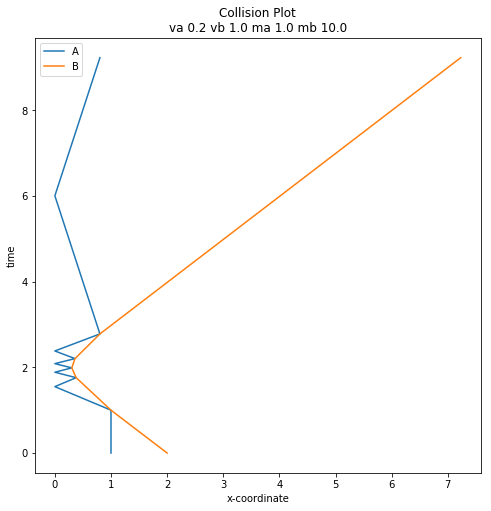

In [15]:
collisionPlot( 0.0, -1.0, 1.0, 10 )

(15, 16)

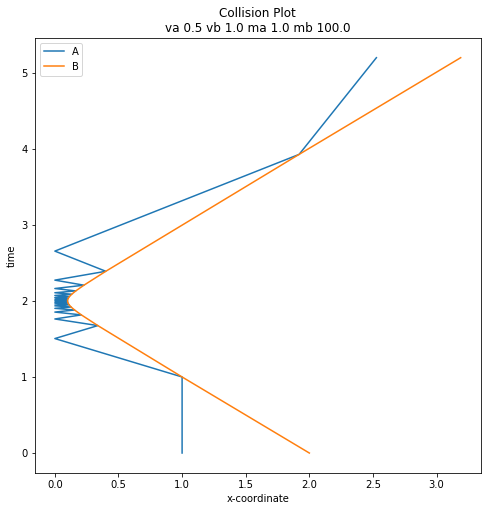

In [16]:
collisionPlot( 0.0, -1.0, 1.0, 100 )